In [2]:
from RetrieveDB import RetrieveDB

cursor = RetrieveDB(db_connect_type = 'LOCAL')

Connection to the 127.0.0.1 for user root created successfully with <sqlalchemy.engine.base.Connection object at 0x00000155D8467D00>.


In [6]:
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns

c:\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
data = pd.DataFrame(cursor.get_price_per_sqft_dashboard())

In [14]:
start_date

datetime.date(2019, 1, 1)

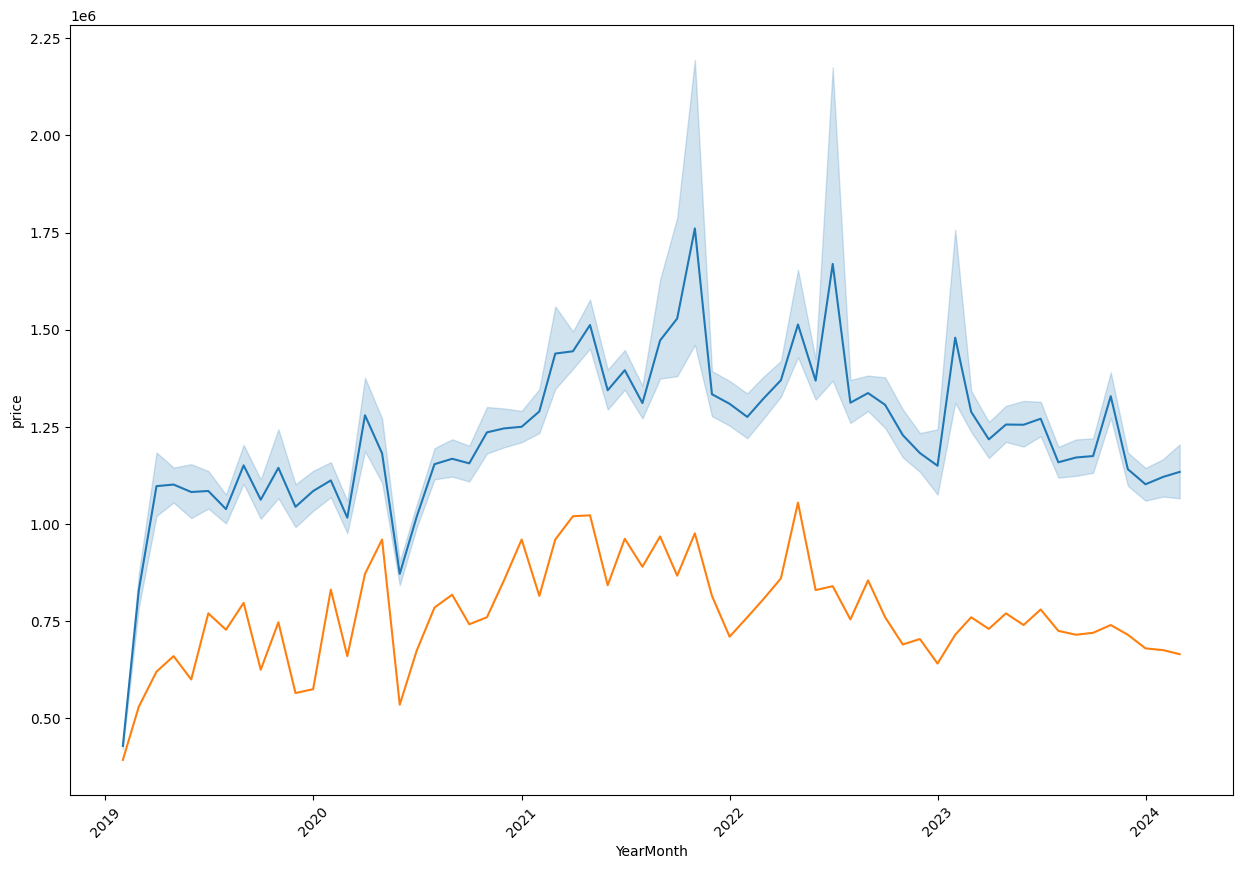

In [17]:
start_date = pd.Timestamp(datetime.date(2019,1,1))
end_date =   pd.to_datetime('today').floor('D')
    
data['transaction_year']= data['transaction_year'].astype(str)
data['transaction_month'] = data['transaction_month'].astype(str)
data['YearMonth'] = pd.to_datetime(data['transaction_year']+ data['transaction_month'], format='%Y%m')

data = data[(data['YearMonth'] >= start_date) & (data['YearMonth'] <= end_date)]



data['YearMonth_str'] = data['transaction_year'] + '-' + data['transaction_month'].str.zfill(2)
monthly_median = data.groupby('YearMonth')['price'].median().reset_index()


data.sort_values('YearMonth', inplace=True)
fig, ax = plt.subplots(figsize=(15, 10))

sns.lineplot(data=data, x='YearMonth', y='price',ax=ax)
sns.lineplot(data=monthly_median, x='YearMonth', y='price',ax=ax)
ax.tick_params(axis='x', labelrotation=45)

In [19]:
districts = pd.DataFrame(cursor.get_districts())
districts

,id,district_name,coordinates
0,1,BEDOK,"[[103.932080145, 1.305547697], [103.932080155,..."
1,2,BUKIT TIMAH,"[[103.797658115, 1.348128473], [103.798064914,..."
2,3,BUKIT BATOK,"[[103.764078849, 1.370011409], [103.764437058,..."
3,4,BUKIT MERAH,"[[103.823614644, 1.260177683], [103.823615961,..."
4,5,CENTRAL WATER CATCHMENT,"[[103.807019599, 1.411258825], [103.807536038,..."
5,6,DOWNTOWN CORE,"[[103.866552121, 1.303862199], [103.866960428,..."
6,7,CHANGI,"[[103.982359462, 1.393557232], [103.982418036,..."
7,8,CHANGI BAY,"[[104.031428865, 1.35740645], [104.031536669, ..."
8,9,LIM CHU KANG,"[[103.722457133, 1.451162339], [103.724261076,..."
9,10,BOON LAY,"[[103.720424356, 1.328239589], [103.720028425,..."


In [20]:
data

,project_name,address,long,lat,transaction_year,transaction_month,type_of_sale,price,property_type,lease_year,lease_duration,floor_range_start,floor_range_end,floor_area,price_per_sqft,YearMonth,YearMonth_str
23188,125 BEDOK NTH RD,125 BEDOK NTH RD,103.939124,1.328843,2019,2,HDB Resale,276000.0,3 ROOM,1978.0,99.0,7.0,9.0,67.0,4119.402985,2019-02-01,2019-02
29766,668D JURONG WEST ST 64,668D JURONG WEST ST 64,103.703001,1.341258,2019,2,HDB Resale,365000.0,4 ROOM,2000.0,99.0,7.0,9.0,85.0,4294.117647,2019-02-01,2019-02
40020,112 LOR 1 TOA PAYOH,112 LOR 1 TOA PAYOH,103.845490,1.341553,2019,2,HDB Resale,295000.0,3 ROOM,1967.0,99.0,7.0,9.0,65.0,4538.461538,2019-02-01,2019-02
40012,27 NEW UPP CHANGI RD,27 NEW UPP CHANGI RD,103.934921,1.324124,2019,2,HDB Resale,295000.0,3 ROOM,1982.0,99.0,10.0,12.0,65.0,4538.461538,2019-02-01,2019-02
29764,984A BUANGKOK LINK,984A BUANGKOK LINK,103.881218,1.381983,2019,2,HDB Resale,365000.0,4 ROOM,2004.0,99.0,10.0,12.0,85.0,4294.117647,2019-02-01,2019-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99790,365 CLEMENTI AVE 2,365 CLEMENTI AVE 2,103.769944,1.312300,2024,3,HDB Resale,485000.0,3 ROOM,1978.0,99.0,4.0,6.0,81.0,5987.654321,2024-03-01,2024-03
198300,THE INTERLACE,DEPOT ROAD,103.803024,1.282201,2024,3,Resale,1690000.0,Condominium,2009.0,99.0,6.0,10.0,98.0,17244.897959,2024-03-01,2024-03
69239,944 HOUGANG ST 92,944 HOUGANG ST 92,103.880435,1.374288,2024,3,HDB Resale,520000.0,4 ROOM,1998.0,99.0,1.0,3.0,101.0,5148.514851,2024-03-01,2024-03
250621,WATTEN HOUSE,SHELFORD ROAD,103.810577,1.328652,2024,3,New sale,6092000.0,Condominium,NaN,NaN,1.0,5.0,172.0,35418.604651,2024-03-01,2024-03


In [21]:
import folium

In [36]:
amentities = pd.DataFrame(cursor.get_amenities())
amentities

,id,district_id,amenity_type,amenity_name,long,lat
0,1,33,MRT,Jurong East,103.742308,1.333207
1,2,3,MRT,Bukit Batok,103.749596,1.349069
2,3,3,MRT,Bukit Gombak,103.751863,1.359043
3,4,36,MRT,Choa Chu Kang,103.744316,1.385417
4,5,36,MRT,Yew Tee,103.747523,1.397383
...,...,...,...,...,...,...
2747,2748,31,Supermarket,I-TEC SUPERMART PTE LTD,103.885153,1.313289
2748,2749,31,Supermarket,YEO HOCK HENG,103.881878,1.313576
2749,2750,1,Supermarket,AZ SUPERMART PTE. LTD.,103.909947,1.338097
2750,2751,13,Supermarket,FOODIE MARKET PLACE PTE. LTD.,103.896150,1.306086


In [39]:
Carpark_kw = {'prefix':'fa',"color": "blue", "icon":"square-parking"}
MRT_kw = {'prefix':'fa',"color": "blue", "icon":"train"}
Gym_kw = {'prefix':'fa',"color": "blue", "icon":"dumbbell"}
Hawker_kw = {'prefix':'fa',"color": "blue", "icon":"utensils"}
Kindergarten_kw = {'prefix':'fa',"color": "blue", "icon":"child-reaching"}
Park_kw = {'prefix':'fa',"color": "blue", "icon":"tree"}
Pharmacy_kw = {'prefix':'fa',"color": "blue", "icon":"capsules"}
Supermarket_kw = {'prefix':'fa',"color": "blue", "icon":"shop"}

amenity_kw_ref = {
    'MRT':MRT_kw,
    'LRT':MRT_kw,
    'Gym':Gym_kw,
    'Hawker':Hawker_kw,
    'Kindergarten':Kindergarten_kw,
    'Park':Park_kw,
    'Carpark':Carpark_kw,
    'Pharmacy':Pharmacy_kw,
    'Supermarket':Supermarket_kw
}



In [41]:
m = folium.Map(location=[1.3521,103.8198], #center of singapore
            zoom_start = 11) #initialize the map in singapore
 
for _,row in amentities.iterrows():
    type = row['amenity_type']
    icon = folium.Icon(**amenity_kw_ref[type])
    folium.Marker(location=[row['lat'], row['long']], icon=icon, tooltip=row['amenity_name']).add_to(m)

m

C:\Users\doraz\AppData\Local\Temp\ipykernel_27048\1245083946.py:6: UserWarning: color argument of Icon should be one of: {'black', 'beige', 'red', 'lightblue', 'darkred', 'blue', 'pink', 'darkblue', 'gray', 'lightgray', 'darkgreen', 'orange', 'lightgreen', 'purple', 'darkpurple', 'cadetblue', 'green', 'white', 'lightred'}.
  icon = folium.Icon(**amenity_kw_ref[type])


In [1]:
from branca.colormap import linear


In [5]:
dir(linear)



['Accent_03',
 'Accent_04',
 'Accent_05',
 'Accent_06',
 'Accent_07',
 'Accent_08',
 'Blues_03',
 'Blues_04',
 'Blues_05',
 'Blues_06',
 'Blues_07',
 'Blues_08',
 'Blues_09',
 'BrBG_03',
 'BrBG_04',
 'BrBG_05',
 'BrBG_06',
 'BrBG_07',
 'BrBG_08',
 'BrBG_09',
 'BrBG_10',
 'BrBG_11',
 'BuGn_03',
 'BuGn_04',
 'BuGn_05',
 'BuGn_06',
 'BuGn_07',
 'BuGn_08',
 'BuGn_09',
 'BuPu_03',
 'BuPu_04',
 'BuPu_05',
 'BuPu_06',
 'BuPu_07',
 'BuPu_08',
 'BuPu_09',
 'Dark2_03',
 'Dark2_04',
 'Dark2_05',
 'Dark2_06',
 'Dark2_07',
 'Dark2_08',
 'GnBu_03',
 'GnBu_04',
 'GnBu_05',
 'GnBu_06',
 'GnBu_07',
 'GnBu_08',
 'GnBu_09',
 'Greens_03',
 'Greens_04',
 'Greens_05',
 'Greens_06',
 'Greens_07',
 'Greens_08',
 'Greens_09',
 'Greys_03',
 'Greys_04',
 'Greys_05',
 'Greys_06',
 'Greys_07',
 'Greys_08',
 'Greys_09',
 'OrRd_03',
 'OrRd_04',
 'OrRd_05',
 'OrRd_06',
 'OrRd_07',
 'OrRd_08',
 'OrRd_09',
 'Oranges_03',
 'Oranges_04',
 'Oranges_05',
 'Oranges_06',
 'Oranges_07',
 'Oranges_08',
 'Oranges_09',
 'PRGn_03

In [21]:
linear.YlOrRd_06.scale(0,1)